<a href="https://colab.research.google.com/github/mdabushad/Beer-Data-Analysis/blob/main/Beer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Beer Data Analysis

In [22]:
# Importing the necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# Load the data from the file
df = pd.read_csv("/content/drive/MyDrive/BeerDataScienceProject.tar.bz2", compression="bz2",encoding="latin-1")

In [24]:
#Display the first few rows of the DataFrame
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [25]:
#dimension of the dataframe
df.shape

(528870, 13)

In [26]:
# Prints a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [27]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


In [28]:
#Generate descriptive statistics for column
df.describe(include=['float64'])


,beer_ABV,review_appearance,review_palette,review_overall,review_taste,review_aroma
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000
mean,7.017442,3.864522,3.758926,3.833197,3.765993,3.817350
std,2.204460,0.604010,0.685335,0.709962,0.669018,0.718903
min,0.010000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,5.300000,3.500000,3.500000,3.500000,3.500000,3.500000
50%,6.500000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,8.500000,4.000000,4.000000,4.500000,4.000000,4.500000
max,57.700000,5.000000,5.000000,5.000000,5.000000,5.000000


###### We can see that for column "review_appearance" and "review_overall" min value is 0 but rating is between 1-5 for other. So, we will remove reviews with min value 0.


In [29]:
# Filter the DataFrame based on the conditions
df = df[(df.review_appearance > 0) & (df.review_overall > 0)]

In [30]:
#Check for the null values
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [31]:
#Percentage of null/missing values
missing_percentage = (df.isna().sum().sum() / np.product(df.shape)) * 100
print(f"Missing Percentage: {np.round(missing_percentage,2)}%")

Missing Percentage: 0.3%


In [32]:
df.dropna(inplace = True)
print(f"Shape after dropping null: {df.shape}")

Shape after dropping null: (508355, 13)


In [33]:
#Check for the duplicate values
df.duplicated(subset = ["review_profileName", "beer_beerId"]).sum()

4658

In [34]:
#dropping the duplicate values
df.drop_duplicates(subset = ["review_profileName", "beer_beerId"], keep = "first", inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")

Shape after dropping duplicates: (503697, 13)


###Question 1 - Rank the top 3 breweries which produce the strongest beers.


In [35]:
# Calculate the average "beer_ABV" for each "beer_brewerId" group
df_avg_beer_ABV = df.groupby(by="beer_brewerId")["beer_ABV"].mean().round(2).reset_index()

# Sort the DataFrame in descending order based on "beer_ABV"
df_avg_beer_ABV = df_avg_beer_ABV.sort_values(by="beer_ABV", ascending=False)

# Rename the "beer_ABV" column to "beer_avg_ABV"
df_avg_beer_ABV = df_avg_beer_ABV.rename(columns={"beer_ABV": "beer_avg_ABV"})

# Display the first few rows of the DataFrame
df_avg_beer_ABV.head()


,beer_brewerId,beer_avg_ABV
699,6513,19.23
165,736,13.75
1466,24215,12.47
8,36,12.45
789,8540,11.75


In [36]:
df_avg_beer_ABV['Rank'] = df_avg_beer_ABV["beer_avg_ABV"].rank(method='dense', ascending = False).astype('int')
print(df_avg_beer_ABV[df_avg_beer_ABV['Rank'] <= 3])

      beer_brewerId  beer_avg_ABV  Rank
699            6513         19.23     1
165             736         13.75     2
1466          24215         12.47     3


###Question 2 - Which year did beers enjoy the highest ratings?

In [37]:
df["review_year"] = pd.to_datetime(df["review_time"], unit='s').dt.year
ratings_by_year = df.groupby(by = ["review_year"])["review_overall"].mean().rename("avg_review")
ratings_by_year.head()

review_year
1998    4.045455
1999    4.000000
2000    4.241379
2001    3.959357
2002    3.818745
Name: avg_review, dtype: float64

In [38]:
reviews_count_by_year = df.groupby(by = ["review_year"])["review_overall"].size().rename("count_review")
reviews_count_by_year.head()


review_year
1998      11
1999      10
2000      29
2001     529
2002    6695
Name: count_review, dtype: int64

In [39]:
merged_df = pd.merge(ratings_by_year, reviews_count_by_year, on = 'review_year', how = 'inner')
merged_df.head()

,avg_review,count_review
review_year,,
1998,4.045455,11
1999,4.000000,10
2000,4.241379,29
2001,3.959357,529
2002,3.818745,6695


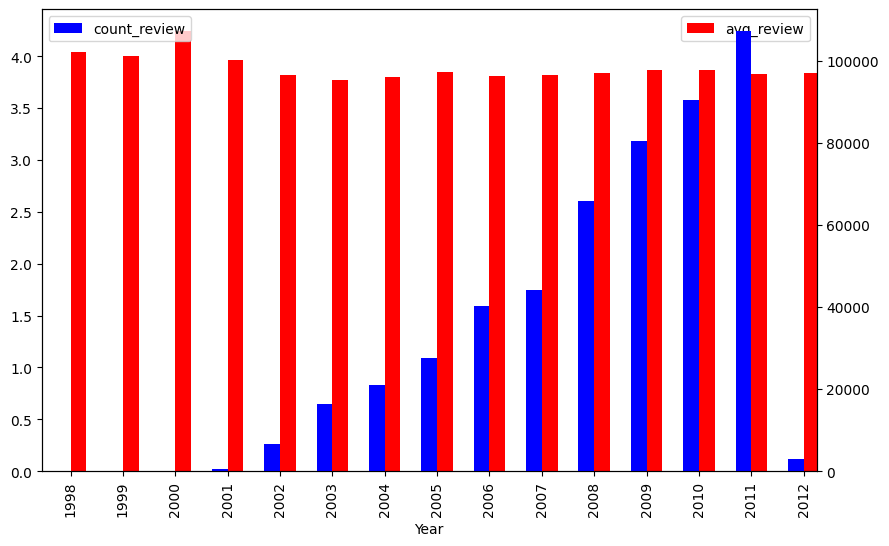

In [40]:
# Create a new figure with a specified size
figure = plt.figure(figsize=(10, 6))

# Add a subplot to the figure
ax1 = figure.add_subplot(111)

# Create a twin axes sharing the x-axis with ax1
ax2 = ax1.twinx()

# Plot the "avg_review" column as a bar chart on ax1
merged_df.plot(y="avg_review", kind="bar", color="r", ax=ax1, position=0, width=0.3)

# Plot the "count_review" column as a bar chart on ax2
merged_df.plot(y="count_review", kind="bar", color="b", ax=ax2, position=1, width=0.3)

# Set the x-label for ax1
ax1.set_xlabel("Year")

# Add a legend to the plot
plt.legend(loc="upper left")

# Display the plot
plt.show()


#####We can observe that for the year 2000, we have the average review score, but the review count is insufficient to make a reliable judgment as the sample size is small and the mean may not be robust. Therefore, we will consider the year 2010, where we have sufficient information to declare it as the highest-rated year for breweries.

###Question 3 - Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [41]:
df_factors = df.groupby(by="beer_beerId")[["review_appearance", "review_palette", "review_taste", "review_aroma", "review_overall"]].mean()
df_factors.head()

,review_appearance,review_palette,review_taste,review_aroma,review_overall
beer_beerId,,,,,
5,3.488095,3.208333,3.323810,3.342857,3.554762
6,3.839839,3.515499,3.513777,3.644087,3.707807
7,3.250382,3.177099,3.107634,3.101527,3.269466
8,3.294118,3.080882,3.301471,3.235294,3.647059
9,3.051724,2.853448,3.103448,3.043103,3.400862


In [42]:
#Calculating the Correlation matrix
correlation_matrix = df_factors.corr()
correlation_matrix



,review_appearance,review_palette,review_taste,review_aroma,review_overall
review_appearance,1.000000,0.669255,0.682221,0.660205,0.637643
review_palette,0.669255,1.000000,0.756162,0.826155,0.767050
review_taste,0.682221,0.756162,1.000000,0.835162,0.823299
review_aroma,0.660205,0.826155,0.835162,1.000000,0.883899
review_overall,0.637643,0.767050,0.823299,0.883899,1.000000


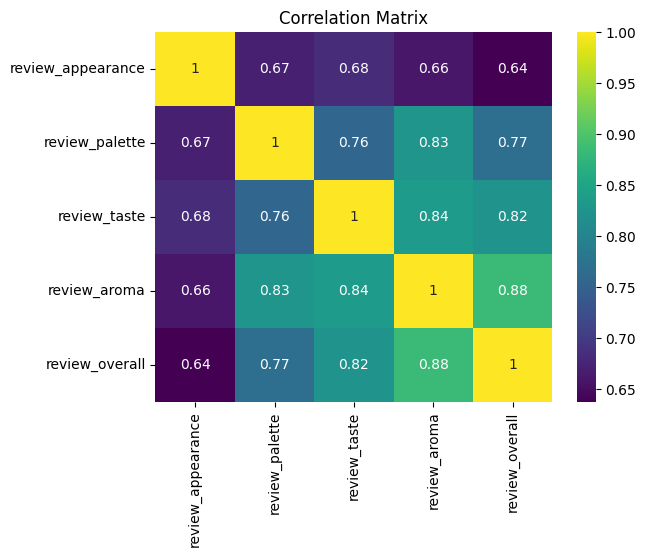

In [43]:
# Visualize correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

#####From heatmap we can see that correlation coefficient for review_aroma(0.88) is highest, it means it is the most important factor based on user ratings.


###Question 4 - If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?


In [47]:
df_grouped = df.groupby('beer_beerId')['review_overall'].agg(['count', 'mean']).\
            rename(columns={'count': 'review_count', 'mean': 'average_rating'}).sort_values(by='average_rating', ascending=False)

df_grouped

,review_count,average_rating
beer_beerId,,
42392,2,5.0
73730,1,5.0
61676,1,5.0
50629,1,5.0
73728,1,5.0
...,...,...
60206,1,1.0
34398,1,1.0
9143,1,1.0


In [ ]:
##### We can see for some the beers, it has been only reviewed once and that is not enough to recommmend it as our answer will be biased.

In [49]:
#check the descriptive statistics
df_grouped.describe()

,review_count,average_rating
count,14990.000000,14990.000000
mean,33.602201,3.650623
std,140.888150,0.625128
min,1.000000,1.000000
25%,1.000000,3.400000
50%,3.000000,3.750000
75%,10.000000,4.000000
max,2928.000000,5.000000


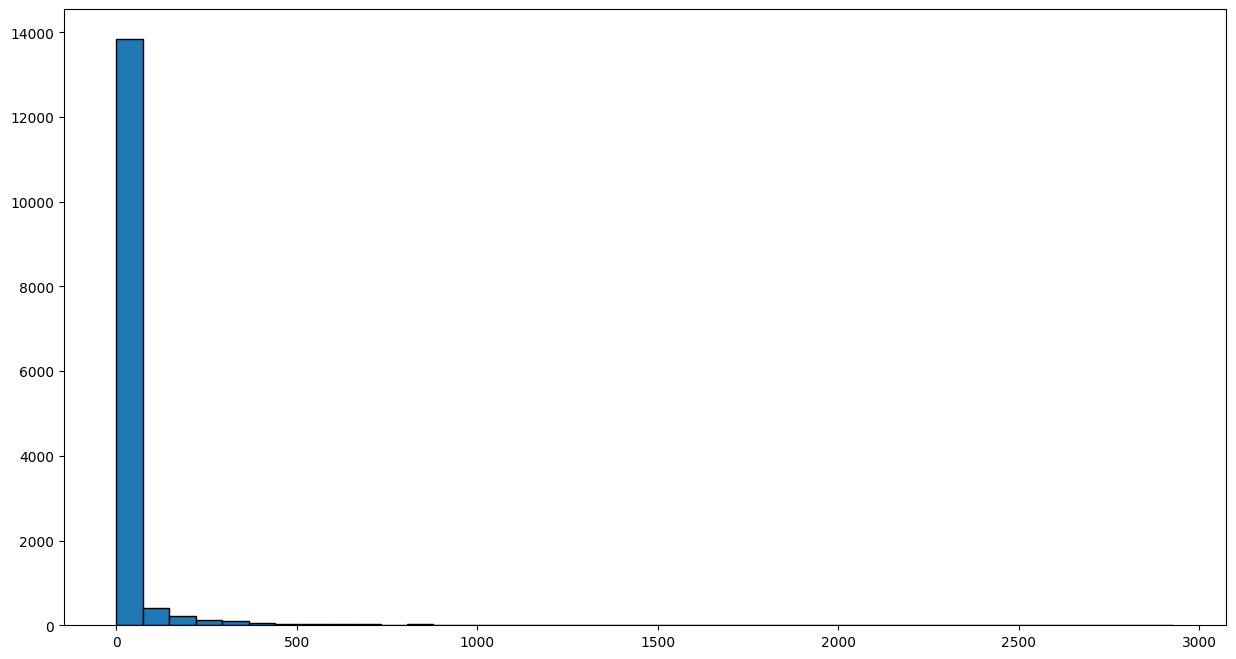

In [55]:
#Plot the histogram distribution to get detailed overview
plt.figure(figsize=(15,8))
plt.hist(df_grouped['review_count'], bins=40, edgecolor='black')
plt.show()


##### We can see most of the reviews are in in single number. So,we will filter out beers with a minimum review count.

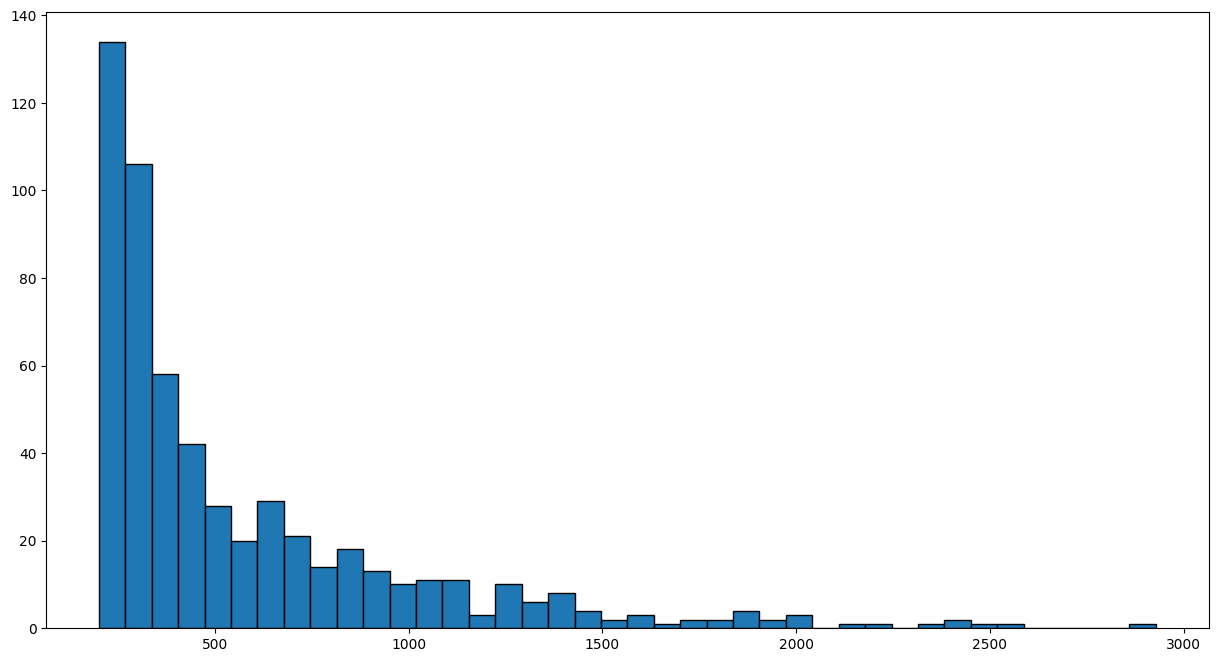

In [58]:
#setting min review at 200 and ploting the distribution again
plt.figure(figsize=(15,8))
plt.hist(df_grouped[df_grouped['review_count'] > 200]['review_count'], bins=40, edgecolor='black')
plt.show()

In [59]:
df_grouped[df_grouped['review_count'] > 200].head()

,review_count,average_rating
beer_beerId,,
56082,246,4.628049
16814,443,4.618510
47658,618,4.592233
6368,627,4.482456
2899,281,4.435943


In [64]:
# Print the top 3 beers
top_beers = df[df["beer_beerId"].isin([56082, 16814, 47658])].drop_duplicates(
    subset="beer_beerId")
top_beers


,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
16176,10.6,47658,1199,Founders CBS Imperial Stout,American Double / Imperial Stout,4.5,4.5,4.5,5.0,ColForbinBC,4.5,750mL bottle poured into a snifter Pours an in...,1321818225,2011
334853,8.0,56082,14064,Citra DIPA,American Double / Imperial IPA,4.0,4.5,4.5,4.0,IdrinkGas,4.5,Poured from a bomber into a Lost Abbey tulip. ...,1314513820,2011
378400,8.0,16814,27039,Heady Topper,American Double / Imperial IPA,4.5,5.0,4.5,4.5,onefmatt,4.5,"A+ in my book, just a fantastic and well round...",1321078004,2011


###Question 4 - Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

In [70]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [72]:
#Apply sentiment analysis to the written reviews and calculate the sentiment score
df['sentiment_score'] = df['review_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year,sentiment_score
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009,0.1879
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009,0.5927
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009,0.3021
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009,0.9772
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010,0.9538


In [85]:
beer_style_sentiment = df.groupby('beer_style')["sentiment_score"].agg(func = ['mean', 'count']).sort_values(by="mean", ascending=False)
beer_style_sentiment


,mean,count
beer_style,,
Quadrupel (Quad),0.857239,4808
Dortmunder / Export Lager,0.855037,1709
Flanders Red Ale,0.850776,2751
Roggenbier,0.850721,137
Braggot,0.850208,197
...,...,...
Happoshu,0.533456,55
American Malt Liquor,0.526695,1332
Japanese Rice Lager,0.516728,488


#####Based on the analysis "Quadrupel (Quad)" beer seems to be favourite based on reviews written.

In [87]:
#Calculate Correlation matrix between "sentiment_score" and "review_overall"
df[df["beer_style"] == "Quadrupel (Quad)"][["sentiment_score", "review_overall"]].corr()

,sentiment_score,review_overall
sentiment_score,1.0000,0.2594
review_overall,0.2594,1.0000


######We can see that there is a weak correlation between sentiment score and overall review


In [88]:
#Corr matrix with other variables
df_corr = df[df["beer_style"] == "Quadrupel (Quad)"][["sentiment_score", "review_overall","review_appearance",
    "review_aroma","review_taste","review_palette"]].corr()
df_corr

,sentiment_score,review_overall,review_appearance,review_aroma,review_taste,review_palette
sentiment_score,1.000000,0.259400,0.201863,0.291776,0.260701,0.235126
review_overall,0.259400,1.000000,0.478643,0.759938,0.678685,0.577633
review_appearance,0.201863,0.478643,1.000000,0.487802,0.509438,0.474235
review_aroma,0.291776,0.759938,0.487802,1.000000,0.688447,0.629594
review_taste,0.260701,0.678685,0.509438,0.688447,1.000000,0.537801
review_palette,0.235126,0.577633,0.474235,0.629594,0.537801,1.000000


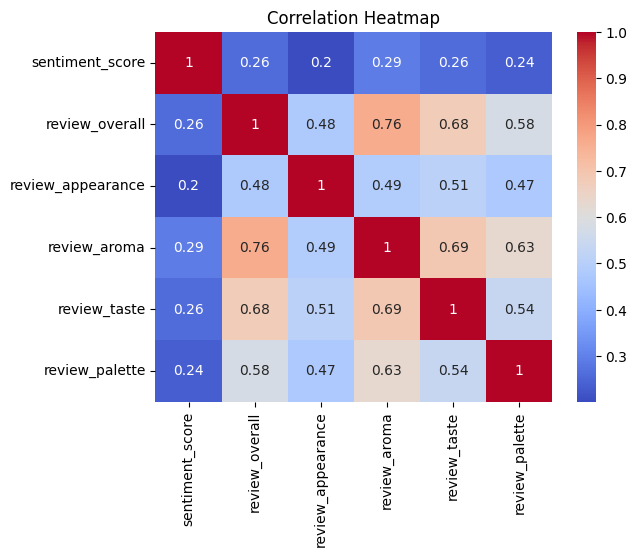

In [92]:
#Plot heatmap
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


#####The review attributes and the sentiment score have a weak positive correlation of around 0.2-0.25. This is because the overall review score better represents users' opinions than the written text. The NLP model used is not as accurate as humans in understanding language. Users can give high scores but leave neutral comments, leading to a lower correlation. Overall, an increase in the sentiment score tends to be associated with a higher overall review score.